In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sim = pd.read_csv("sim.csv")
print(sklearn.__version__)

0.21.3


In [72]:
for index, row in sim.iterrows():
    if row.drone == 0:
        terrestrial_dRSRP.append(row.dRSRP) 
        terrestrial_RSSI.append(row.RSSI)
    else:
        drone_dRSRP.append(row.dRSRP) 
        drone_RSSI.append(row.RSSI)
        
#for index, row in sim.iterrows():
#    if row.altitude == (range of meters):
#       range_of_meters.append(row.dRSRP) 
#       range_of_meters.append(row.RSSI)
#    else:
#        range_of_meters.append(row.dRSRP) 
#        range_of_meters.append(row.RSSI)

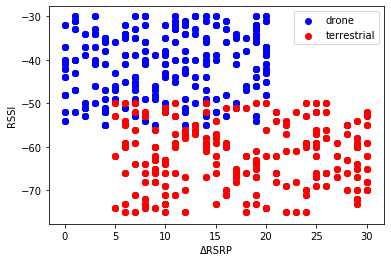

In [73]:
plt.xlabel('ΔRSRP')
plt.ylabel('RSSI')
ax = plt.gca()
ax.scatter(drone_dRSRP, drone_RSSI, color="b", label = 'drone')
ax.scatter(terrestrial_dRSRP, terrestrial_RSSI, color="r", label = 'terrestrial')
ax.legend()

#plt.xlabel('ΔRSRP')
#plt.ylabel('RSSI')
#ax = plt.gca()
#ax.scatter(drone_dRSRP, drone_RSSI, color="b", label = '10 - 15 meters e.g.')
#ax.scatter(terrestrial_dRSRP, terrestrial_RSSI, color="r", label = '200 - 300 meters e.g.')
#ax.legend()

In [13]:
y = sim.drone.copy()
X = sim.drop(['drone'], axis=1)
features = sim.columns
features = list(features.drop(['drone']))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\12148\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']

In [17]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.9125
Precision: 0.9069767441860465
Recall: 0.9285714285714286


[[0.33401697 0.66598303]
 [0.06875933 0.93124067]
 [0.03128815 0.96871185]
 [0.31676183 0.68323817]
 [0.68881734 0.31118266]
 [0.97295103 0.02704897]
 [0.08229204 0.91770796]
 [0.38772983 0.61227017]
 [0.37114416 0.62885584]
 [0.05382061 0.94617939]
 [0.07879113 0.92120887]
 [0.61948796 0.38051204]
 [0.94672126 0.05327874]
 [0.23257244 0.76742756]
 [0.91611127 0.08388873]
 [0.64532618 0.35467382]
 [0.23712288 0.76287712]
 [0.77393737 0.22606263]
 [0.24107751 0.75892249]
 [0.09001142 0.90998858]
 [0.54271306 0.45728694]
 [0.88164295 0.11835705]
 [0.34803454 0.65196546]
 [0.14943256 0.85056744]
 [0.07696614 0.92303386]
 [0.11272052 0.88727948]
 [0.09576539 0.90423461]
 [0.9800087  0.0199913 ]
 [0.54420557 0.45579443]
 [0.73100356 0.26899644]
 [0.08897155 0.91102845]
 [0.07295934 0.92704066]
 [0.93179904 0.06820096]
 [0.05307136 0.94692864]
 [0.62596572 0.37403428]
 [0.0584597  0.9415403 ]
 [0.75073339 0.24926661]
 [0.96116762 0.03883238]
 [0.14944401 0.85055599]
 [0.96422383 0.03577617]


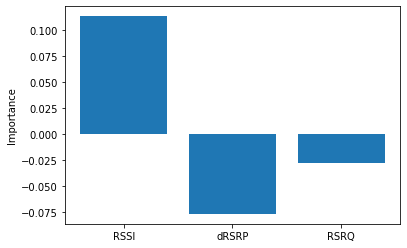

In [74]:
print(model.predict_proba(X_test))
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %s: , Score: %0.5f' % (features[i],v))
# plot feature importance
plt.bar(features, importance)
plt.ylabel('Importance')
plt.show()

Text(0.5, 15.0, 'Predicted')

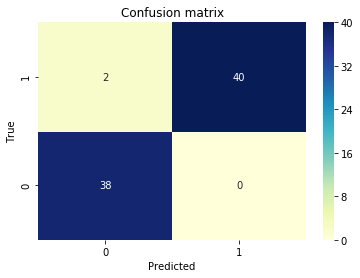

In [84]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt='g')
ax.set_ylim([0,2])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')